# Imports

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating DF

In [2]:

columns = [
    'id'
    , 'title'
    , 'publishedAt'
    , 'duration'
    , 'viewCount'
    , 'likeCount'
    , 'commentCount'
]
df = pd.DataFrame(columns=columns)

In [3]:
video_array = [
    'video_api_data_full\\full_videos_output_1_50.json'
    , 'video_api_data_full\\full_videos_output_51_100.json'
    , 'video_api_data_full\\full_videos_output_101_150.json'
    , 'video_api_data_full\\full_videos_output_all_long.json'
]
for file_name in video_array:
    #print('Done')
    video_data_file = open(file_name)
    video_data = json.load(video_data_file)
    for item in video_data['items']:
        try:
            df.loc[-1] = [
                item['id']
                , item['snippet']['title']
                , item['snippet']['publishedAt']
                , item['contentDetails']['duration']
                , item['statistics']['viewCount']
                , item['statistics']['likeCount']
                , item['statistics']['commentCount']
            ]
        except:
            df.loc[-1] = [
                item['id']
                , item['snippet']['title']
                , item['snippet']['publishedAt']
                , item['contentDetails']['duration']
                , item['statistics']['viewCount']
                , item['statistics']['likeCount']
                , 0 # Watching Dance Till You're Dead For 10 Hours - HAS NO COMMENTS
            ]
        df.index = df.index + 1

Done
Done
Done
Done


In [6]:
import re
from dateutil import parser

# test = df['duration'][0]

# print(re.findall(r'(?:PT)(\d*)(?:M)(\d*)(?:S)', test))
#print(re.findall(r'\d+', test))
def duration_to_seconds(item):
    h_m_s = re.findall(r'PT(\d+H)?(\d+M)?(\d+S)?', item)
    #print(h_m_s)
    try:
        hrs = int(h_m_s[0][0][:-1])
    except:
        hrs = 0
    try:
        mins = int(h_m_s[0][1][:-1])
    except:
        mins = 0
    try:
        secs = int(h_m_s[0][2][:-1])
    except:
        secs = 0
    return (hrs*(60*60))+(mins*60)+secs

def duration_to_minutes(item):
    return item/60

def duration_to_hours(item):
    return item/(60*60)

def published_at_datetime(item):
    return parser.parse(item)



df['seconds'] = df['duration'].apply(lambda x: duration_to_seconds(x))
df['minutes'] = df['seconds'].apply(lambda x: duration_to_minutes(x))
df['hours'] = df['seconds'].apply(lambda x: duration_to_hours(x))
df['publishedAt'] = df['publishedAt'].apply(lambda x: published_at_datetime(x))

In [7]:
df['viewCount'] = df['viewCount'].astype(int)
df['likeCount'] = df['likeCount'].astype(int)
df['commentCount'] = df['commentCount'].astype(int)

# EDA

### CUTTING TO ONLY 100 LATEST VIDEOS

We are only using videos longer than 4 minutes becuase the YouTube Api starts to pull shorts if you get all "short" video ids from a channel

In [10]:
df.sort_values(by='publishedAt',ascending=False,inplace=True)
df = df.iloc[0:100,:]

# Column Creation

In [12]:
df['I_is_first_in_title'] = df['title'].apply(lambda x: 1 if str.lower(x[0])=='i' else 0)
df['money_in_title'] = df['title'].apply(lambda x: 1 if "$" in x else 0)
df['minutes_round'] = np.round(df['minutes'])
df['longer_than_5_mins'] = df['minutes'].apply(lambda x: 1 if x>5 else 0)
df['longer_than_10_mins'] = df['minutes'].apply(lambda x: 1 if x>10 else 0)
df['longer_than_15_mins'] = df['minutes'].apply(lambda x: 1 if x>15 else 0)
df['longer_than_20_mins'] = df['minutes'].apply(lambda x: 1 if x>20 else 0)
df['viewCountMillions'] = df['viewCount'] / 1000000

In [13]:
df.describe()

,viewCount,likeCount,commentCount,seconds,minutes,hours,I_is_first_in_title,money_in_title,minutes_round,longer_than_5_mins,longer_than_10_mins,longer_than_15_mins,longer_than_20_mins,viewCountMillions
count,1.000000e+02,1.000000e+02,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,100.000000,100.000000,100.000000
mean,1.235171e+08,3.531127e+06,130303.310000,839.37000,13.989500,0.233158,0.440000,0.470000,13.970000,0.99,0.880000,0.410000,0.040000,123.517140
std,5.159789e+07,1.701615e+06,97917.697648,228.22918,3.803820,0.063397,0.498888,0.501614,3.817702,0.10,0.326599,0.494311,0.196946,51.597894
min,4.114869e+07,1.240570e+06,30945.000000,295.00000,4.916667,0.081944,0.000000,0.000000,5.000000,0.00,0.000000,0.000000,0.000000,41.148686
25%,9.198210e+07,2.663371e+06,81896.250000,704.00000,11.733333,0.195556,0.000000,0.000000,12.000000,1.00,1.000000,0.000000,0.000000,91.982096
50%,1.177169e+08,3.357315e+06,109988.000000,841.00000,14.016667,0.233611,0.000000,0.000000,14.000000,1.00,1.000000,0.000000,0.000000,117.716871
75%,1.479530e+08,4.130260e+06,147747.000000,947.25000,15.787500,0.263125,1.000000,1.000000,16.000000,1.00,1.000000,1.000000,0.000000,147.953023
max,3.637002e+08,1.545707e+07,742651.000000,1680.00000,28.000000,0.466667,1.000000,1.000000,28.000000,1.00,1.000000,1.000000,1.000000,363.700221


In [14]:
df.corr()['viewCount']

C:\Users\fligo\AppData\Local\Temp\ipykernel_6536\3459983835.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['viewCount']


viewCount              1.000000
likeCount              0.704373
commentCount           0.386983
seconds                0.281784
minutes                0.281784
hours                  0.281784
I_is_first_in_title    0.044535
money_in_title         0.057862
minutes_round          0.285173
longer_than_5_mins     0.069478
longer_than_10_mins    0.097250
longer_than_15_mins    0.225321
longer_than_20_mins    0.160854
viewCountMillions      1.000000
Name: viewCount, dtype: float64

In [15]:
print(df.groupby('longer_than_5_mins')['viewCountMillions'].max())
print(df.groupby('longer_than_10_mins')['viewCountMillions'].max())
print(df.groupby('longer_than_15_mins')['viewCountMillions'].max())
print(df.groupby('longer_than_20_mins')['viewCountMillions'].max())

longer_than_5_mins
0     88.026277
1    363.700221
Name: viewCountMillions, dtype: float64
longer_than_10_mins
0    172.396440
1    363.700221
Name: viewCountMillions, dtype: float64
longer_than_15_mins
0    238.479763
1    363.700221
Name: viewCountMillions, dtype: float64
longer_than_20_mins
0    260.584348
1    363.700221
Name: viewCountMillions, dtype: float64


In [16]:
df[df['viewCount']>200000000].sort_values(by='viewCount',ascending=False)

,id,title,publishedAt,duration,viewCount,likeCount,commentCount,seconds,minutes,hours,I_is_first_in_title,money_in_title,minutes_round,longer_than_5_mins,longer_than_10_mins,longer_than_15_mins,longer_than_20_mins,viewCountMillions
25,0e3GPea1Tyg,"$456,000 Squid Game In Real Life!",2021-11-24 21:00:01+00:00,PT25M42S,363700221,15457066,615989,1542,25.700000,0.428333,0,1,26.0,1,1,1,1,363.700221
152,zxYjTTXc-J8,"Last To Leave Circle Wins $500,000",2021-08-31 20:01:03+00:00,PT19M26S,260584348,5502711,115988,1166,19.433333,0.323889,0,1,19.0,1,1,1,0,260.584348
113,r7zJ8srwwjk,I Spent 50 Hours In Solitary Confinement,2020-05-30 20:10:08+00:00,PT15M52S,242695381,4146292,114679,952,15.866667,0.264444,1,0,16.0,1,1,1,0,242.695381
141,9bqk6ZUsKyA,I Spent 50 Hours Buried Alive,2021-03-27 20:00:04+00:00,PT12M40S,238479763,7048626,247758,760,12.666667,0.211111,1,0,13.0,1,1,0,0,238.479763
130,GLoeAJUcz38,"Press This Button To Win $100,000!",2020-11-14 21:00:02+00:00,PT15M11S,223524870,3714846,91075,911,15.183333,0.253056,0,1,15.0,1,1,1,0,223.524870
21,yXWw0_UfSFg,Anything You Can Fit In The Circle I’ll Pay For,2020-03-07 21:00:00+00:00,PT20M,205218227,4467947,114113,1200,20.000000,0.333333,0,0,20.0,1,1,1,0,205.218227


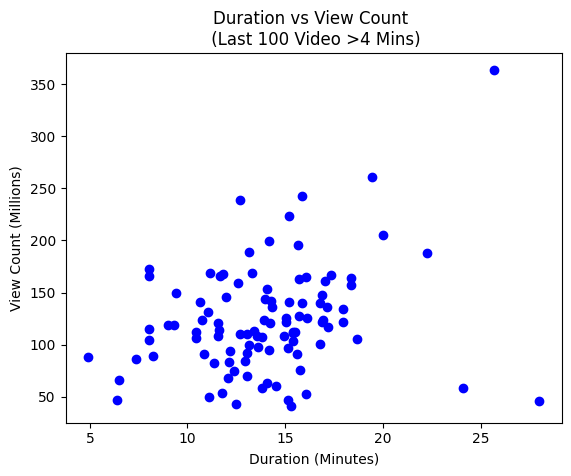

In [17]:
#plt.scatter(df['minutes'],df['viewCountMillions'],c=df['publishedAt'],cmap='RdYlGn')
plt.scatter(df['minutes'],df['viewCountMillions'],c='blue')

plt.xlabel('Duration (Minutes)')
plt.ylabel('View Count (Millions)')
plt.title('Duration vs View Count \n (Last 100 Video >4 Mins)')
plt.savefig('images/duration_vs_view_count.jpg')

In [42]:
#test = df[(df['minutes']>15)&(df['minutes']<20)]
test = df.sort_values(by='publishedAt')
test['last_20'] = [1]*20 + [0]*80

Text(0.5, 1.0, 'Duration vs View Count \n (Last 100 Video >4 Mins)')

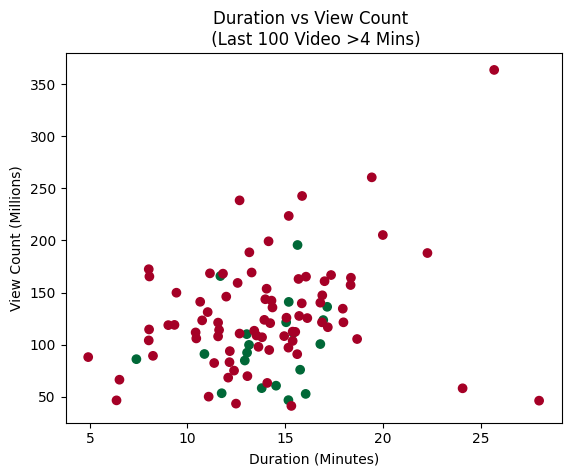

In [44]:
plt.scatter(test['minutes'],test['viewCountMillions'],c=test['last_20'],cmap='RdYlGn')
#plt.scatter(test['minutes'],test['viewCountMillions'],c='blue')

plt.xlabel('Duration (Minutes)')
plt.ylabel('View Count (Millions)')
plt.title('Duration vs View Count \n (Last 100 Video >4 Mins)')
#plt.savefig('images/duration_vs_view_count.jpg')

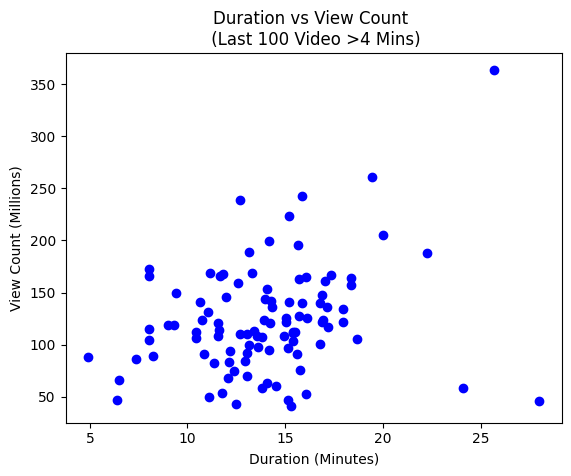

In [40]:
#plt.scatter(df['minutes'],df['viewCountMillions'],c=df['publishedAt'],cmap='RdYlGn')
plt.scatter(df['minutes'],df['viewCountMillions'],c='blue')

plt.xlabel('Duration (Minutes)')
plt.ylabel('View Count (Millions)')
plt.title('Duration vs View Count \n (Last 100 Video >4 Mins)')
plt.savefig('images/duration_vs_view_count.jpg')

4-5 : 1
6-7 : 2
7-8 : 1
8-9 : 5
9-10 : 3
10-11 : 5
11-12 : 11
12-13 : 9
13-14 : 13
14-15 : 9
15-16 : 18
16-17 : 8
17-18 : 6
18-19 : 3
19-20 : 1
22-23 : 1
24-25 : 1
25-26 : 1


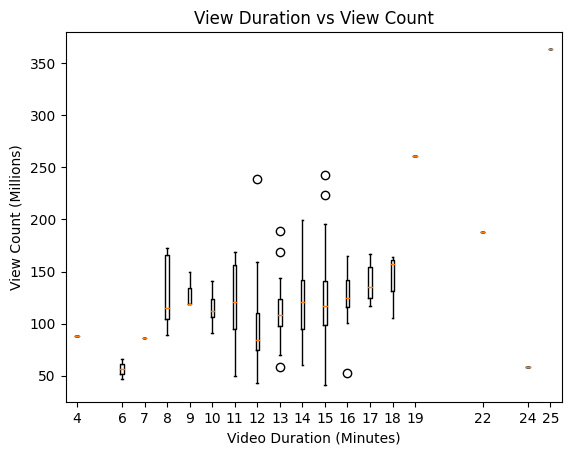

In [33]:
avg_count_time_duration = {}
fig = plt.figure()
ax = plt.subplot(111)
for a in range(3,30,1):
    curr_df = df[(df['minutes']>a)&(df['minutes']<(a+1))]
    if len(curr_df)!=0:
        print(f"{a}-{a+1} : {len(curr_df)}")
        ax.boxplot(curr_df['viewCountMillions'], positions = [a])
    #plt.boxplot(curr_df['viewCount'])
    #plt.show()
    #median_count
    #avg_count_time_duration[b] = avg_count
    # if avg_count>0:
    #     print(f"Between {a} and {b} minutes : {avg_count}")
ax.set_title('View Duration vs View Count')
ax.set_xlabel('Video Duration (Minutes)')
ax.set_ylabel('View Count (Millions)')
plt.savefig('images\\boxplot_view_times.jpg')

Text(0, 0.5, 'View Count (Millions)')

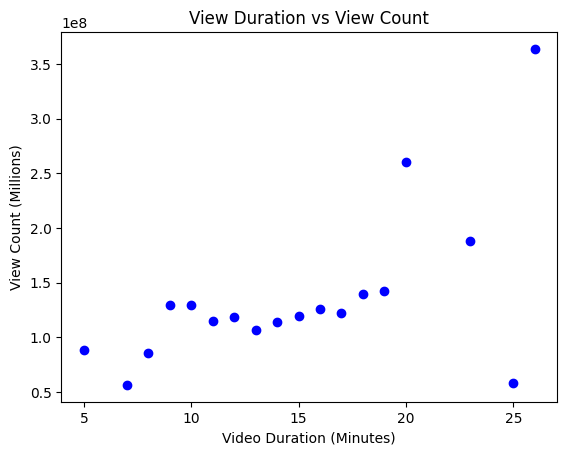

In [115]:
avg_count_time_duration = {}
fig = plt.figure()
ax = plt.subplot(111)
for a in range(3,30,1):
    curr_mean = df[(df['minutes']>a)&(df['minutes']<(a+1))]['viewCount'].mean()
    ax.scatter(a+1,curr_mean,color='blue')
ax.set_title('View Duration vs View Count')
ax.set_xlabel('Video Duration (Minutes)')
ax.set_ylabel('View Count (Millions)')

<BarContainer object of 0 artists>

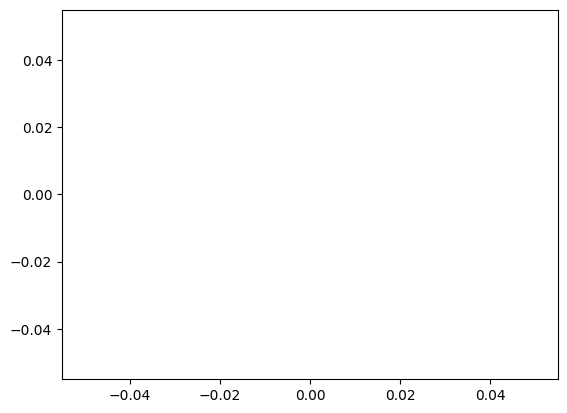

In [116]:
plt.bar(avg_count_time_duration.keys(),avg_count_time_duration.values())

In [95]:
df.minutes.min()

4.916666666666667

,id,title,publishedAt,duration,viewCount,likeCount,commentCount,seconds,minutes,hours,I_is_first_in_title,money_in_title,minutes_round,longer_than_5_mins,longer_than_10_mins,longer_than_15_mins,longer_than_20_mins,viewCountMillions
175,TJ2ifmkGGus,"1,000 Blind People See For The First Time",2023-01-28 21:00:00+00:00,PT8M1S,104049678,8340630,350173,481,8.016667,0.133611,0,0,8.0,1,0,0,0,104.049678
174,7IKab3HcfFk,I Survived 50 Hours In Antarctica,2022-12-24 20:59:59+00:00,PT12M10S,93756727,3903088,149139,730,12.166667,0.202778,1,0,12.0,1,1,0,0,93.756727
173,h5NvTTOlOtI,Hydraulic Press Vs Lamborghini,2022-12-10 21:00:01+00:00,PT10M25S,111706959,4405020,126673,625,10.416667,0.173611,0,0,10.0,1,1,0,0,111.706959
172,0CTp1a-aCUM,"100 Kids Vs 100 Adults For $500,000",2022-12-03 21:00:00+00:00,PT15M23S,112471275,3187307,93260,923,15.383333,0.256389,0,1,15.0,1,1,1,0,112.471275
171,kX3nB4PpJko,"Last To Take Hand Off Jet, Keeps It!",2022-11-12 21:00:00+00:00,PT15M37S,90835505,3328644,104899,937,15.616667,0.260278,0,0,16.0,1,1,1,0,90.835505


C:\Users\fligo\AppData\Local\Temp\ipykernel_17776\132161829.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bD" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x,y,'-bD',markevery=markers_on, color='blue')


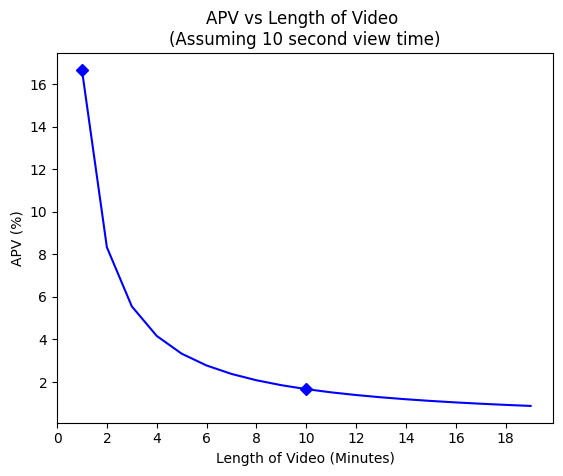

In [117]:
x = list(range(1,20,1))
y = [(0.16666667/x)*100 for x in x]
markers_on = [0,9]
plt.plot(x,y,'-bD',markevery=markers_on, color='blue')
plt.title('APV vs Length of Video \n(Assuming 10 second view time)')
plt.ylabel('APV (%)')
plt.xlabel('Length of Video (Minutes)')
plt.xticks(range(0,20,2));

In [119]:
df.head()

,id,title,publishedAt,duration,viewCount,likeCount,commentCount,seconds,minutes,hours,I_is_first_in_title,money_in_title,minutes_round,longer_than_5_mins,longer_than_10_mins,longer_than_15_mins,longer_than_20_mins,viewCountMillions
175,TJ2ifmkGGus,"1,000 Blind People See For The First Time",2023-01-28 21:00:00+00:00,PT8M1S,104049678,8340630,350173,481,8.016667,0.133611,0,0,8.0,1,0,0,0,104.049678
174,7IKab3HcfFk,I Survived 50 Hours In Antarctica,2022-12-24 20:59:59+00:00,PT12M10S,93756727,3903088,149139,730,12.166667,0.202778,1,0,12.0,1,1,0,0,93.756727
173,h5NvTTOlOtI,Hydraulic Press Vs Lamborghini,2022-12-10 21:00:01+00:00,PT10M25S,111706959,4405020,126673,625,10.416667,0.173611,0,0,10.0,1,1,0,0,111.706959
172,0CTp1a-aCUM,"100 Kids Vs 100 Adults For $500,000",2022-12-03 21:00:00+00:00,PT15M23S,112471275,3187307,93260,923,15.383333,0.256389,0,1,15.0,1,1,1,0,112.471275
171,kX3nB4PpJko,"Last To Take Hand Off Jet, Keeps It!",2022-11-12 21:00:00+00:00,PT15M37S,90835505,3328644,104899,937,15.616667,0.260278,0,0,16.0,1,1,1,0,90.835505


# Model Building for Feature Importance
This may give us an idea of what correlates most with a higher view count.

In [123]:
!pip install scikit-learn

     ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
     ---- ----------------------------------- 1.0/8.4 MB 21.1 MB/s eta 0:00:01
     ----------- ---------------------------- 2.4/8.4 MB 25.9 MB/s eta 0:00:01
     ------------------ --------------------- 3.8/8.4 MB 26.9 MB/s eta 0:00:01
     ------------------------- -------------- 5.4/8.4 MB 28.8 MB/s eta 0:00:01
     ------------------------------- -------- 6.7/8.4 MB 28.4 MB/s eta 0:00:01
     -------------------------------------- - 8.0/8.4 MB 28.5 MB/s eta 0:00:01
     ---------------------------------------  8.4/8.4 MB 28.2 MB/s eta 0:00:01
     ---------------------------------------- 8.4/8.4 MB 25.5 MB/s eta 0:00:00
  Using cached scipy-1.10.0-cp39-cp39-win_amd64.whl (42.5 MB)
     ---------------------------------------- 0.0/298.0 kB ? eta -:--:--
     ------------------------------------- 298.0/298.0 kB 19.2 MB/s eta 0:00:00


In [125]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = df[['seconds','I_is_first_in_title','money_in_title','longer_than_5_mins','longer_than_10_mins','longer_than_15_mins','longer_than_20_mins']]
# y = 1 * x_0 + 2 * x_1 + 3
y = df['viewCount']
reg = LinearRegression().fit(X, y)
reg.score(X, y)

reg.coef_

reg.intercept_


39010601.47203399

In [127]:
for a,b in zip(X,reg.coef_):
    print(a,b)

seconds 114013.7957163726
I_is_first_in_title 15381605.791636288
money_in_title 2996356.7995613012
longer_than_5_mins 11597515.796614412
longer_than_10_mins -32473690.2877758
longer_than_15_mins -3087641.1242611706
longer_than_20_mins -25204406.026447743
